# 데이터 불러오고 결합하기

In [1]:
import pandas as pd

In [2]:
df_total=pd.DataFrame()

In [3]:
## 파일 불러오고 합치기
df_total=pd.DataFrame()
for i in range (1,81,1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])

In [4]:
df_total

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,20200328232420,20200328232628,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,129.354538,36.009020
3871,20200328232523,20200328233525,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북구보건소,129.379384,36.070790,삼성쉐르빌,129.405302,36.086089
3872,20200328232554,20200328233435,160,문덕-대송-송도-죽도-용흥,일반,N,N,북구청,129.367128,36.041941,송림초등학교,129.375650,36.029730
3873,20200328232722,20200328235259,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,SK뷰2차,129.340636,36.008334


# 한글컬럼명으로 변경

In [5]:
col_name = pd.read_excel('./포항/trfcard(1)/trfcard_columns.xlsx', header = 2)
col_name

,구분,컬럼명 (영문),컬럼명 (한글),Not Null 여부,데이터 타입,길이,PK 정보,FK 정보,제약 조건,컬럼 설명
0,NaN,on_date,승차시각,Y,datetime,NaN,Y,NaN,NaN,NaN
1,NaN,off_date,하차시각,Y,datetime,NaN,NaN,NaN,NaN,NaN
2,NaN,route_name,노선명,Y,varchar,100,NaN,NaN,NaN,NaN
3,NaN,descr,노선설명,Y,varchar,100,NaN,NaN,NaN,NaN
4,NaN,age_type,승객연령,Y,varchar,20,NaN,NaN,NaN,NaN
5,NaN,trans_yn,환승여부,Y,varchar,1,NaN,NaN,NaN,NaN
6,NaN,addfee_yn,추가운임여부,Y,varchar,1,NaN,NaN,NaN,NaN
7,NaN,start_bstop,승차정류장,Y,varchar,100,NaN,NaN,NaN,NaN
8,NaN,start_gps_x,승차정류장 GPS X,Y,numeric,"10,7",NaN,NaN,NaN,NaN
9,NaN,start_gps_y,승차정류장 GPS Y,Y,numeric,"10,7",NaN,NaN,NaN,NaN


In [6]:
## 한글컬럼명으로 변경
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명 (한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [7]:
df_total.columns = kor_col

In [8]:
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826


# 소요시간 계산하기

In [9]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [10]:
df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826,0 days 00:04:29


# 소요시간 초단위로 변경

In [11]:
df_total['소요시간(초)'] = df_total['소요시간'].astype('timedelta64[s]')

In [12]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,소요시간,소요시간(초)
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209,0 days 00:07:55,475.0
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468,0 days 00:32:11,1931.0
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,0 days 00:03:41,221.0
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816,0 days 00:34:29,2069.0
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826,0 days 00:04:29,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,20200328232420,20200328232628,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,129.354538,36.009020,0 days 00:02:08,128.0
3871,20200328232523,20200328233525,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북구보건소,129.379384,36.070790,삼성쉐르빌,129.405302,36.086089,0 days 00:10:02,602.0
3872,20200328232554,20200328233435,160,문덕-대송-송도-죽도-용흥,일반,N,N,북구청,129.367128,36.041941,송림초등학교,129.375650,36.029730,0 days 00:08:41,521.0
3873,20200328232722,20200328235259,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,SK뷰2차,129.340636,36.008334,0 days 00:25:37,1537.0


In [15]:
df_total_num = df_total.groupby('노선명').sum().reset_index()
df_total_num

,노선명,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y,소요시간(초)
0,100,2.125310e+06,5.923056e+05,2.125431e+06,5.920787e+05,18670915.0
1,100(냉수),7.916616e+05,2.205971e+05,7.916933e+05,2.205462e+05,7292418.0
2,100(반곡),6.709469e+05,1.870122e+05,6.710013e+05,1.869301e+05,6148453.0
3,101,1.028677e+07,2.865157e+06,1.028573e+07,2.864610e+06,73446223.0
4,101S,9.062054e+02,2.520168e+02,9.056118e+02,2.523020e+02,7910.0
...,...,...,...,...,...,...
78,흥해공영(죽도시장),5.975522e+04,1.666747e+04,5.975933e+04,1.666862e+04,373273.0
79,흥해지선(덕성용곡),1.233890e+05,3.445838e+04,1.233966e+05,3.444950e+04,740056.0
80,흥해지선(봉림),1.293639e+04,3.611044e+03,1.293479e+04,3.611024e+03,73428.0
81,흥해지선(신흥),1.034845e+03,2.891798e+02,1.034772e+03,2.888832e+02,7672.0


# 노선별 소요시간 집계

In [20]:
df_total_num_dec_30 = df_total_num.sort_values('소요시간(초)', ascending = False).head(30).reset_index(drop=True)[['노선명','소요시간(초)']]
df_total_num_dec_30

,노선명,소요시간(초)
0,107,91442543.0
1,105,85343121.0
2,200,84558948.0
3,102,76203671.0
4,101,73446223.0
5,108,54693575.0
6,109,53319674.0
7,175,52339667.0
8,500,48347552.0
9,130,38676682.0


# 데이터 시각화

In [21]:
import matplotlib.pyplot as plt

In [22]:
k = []
for x in range(len(df_total_num_dec_30)):
    k.append(df_total_num_dec_30['노선명'][x])
k

['107',
 '105',
 '200',
 '102',
 '101',
 '108',
 '109',
 '175',
 '500',
 '130',
 '700',
 '131',
 '160',
 '100',
 '기계지선(기계)',
 '800',
 '510',
 '구룡포지선(호미곶)',
 '100(냉수)',
 '600',
 '100(반곡)',
 '210',
 '청하지선(기본)',
 '110',
 '동해지선(대동배)',
 '구룡포지선(양포)',
 '510(상행칠포)',
 '청하지선',
 '기계지선(죽장)',
 '청하지선(마북기일)']

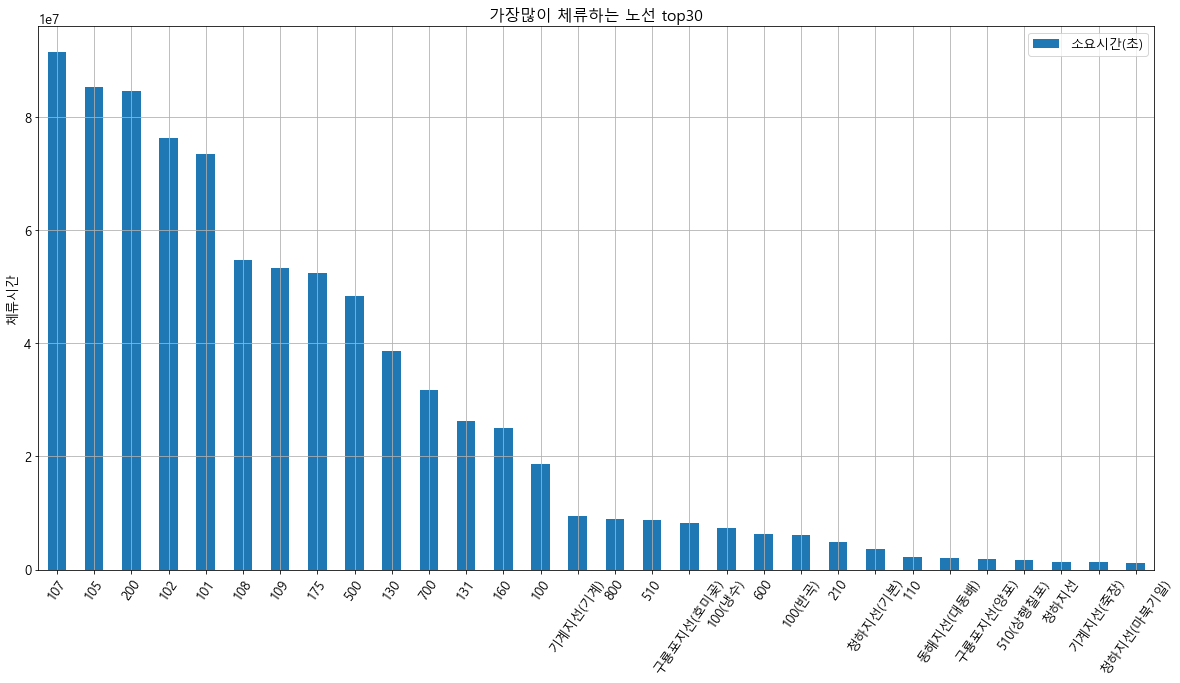

In [23]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
df_total_num_dec_30.plot(kind='bar')

plt.title("가장많이 체류하는 노선 top30")
plt.ylabel("체류시간")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(0,30,1)], k, rotation = 55)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()